## Author: Paweł Jelonek <br> Date: 30.05.2021
### Machine learning course:<br> Lecture 4 - Classification

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import SVG, Image
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

plt.rcParams["figure.figsize"]=(20, 10)

Proszę opracować paradygmat uczenia:
1.	Klasyfikator k-NN (k-Nearest Neighbors).
2.	Klasyfikator Drzewo Decyzyjne.
3.	Regresja Logistyczna
4.	Naiwny Bayes
5.	LDA (Linear Discriminant Analysis)
6.	SVM (Support Vector Machine)
7.	MLP (Multi Layer Perceptron)

W ramach danego paradygmatu uczenia przedstawić:
-   podstawy teoretyczne (krótko)
-   metody/typy
-   parametry, regularyzację, optymalizację
-   implementację (własną lub biblioteczną): uczenie, predykcja (testowanie)
-   typowe metryki wraz z metodami ich wyliczania
-   wizualizację: zbioru/modelu
-   uczenie na wybranym zbiorze danych (przy wielu metodach w ramach paradygmatu, na różnych zbiorach danych)

## <center>1. k-NN (k-Nearest Neighbors)</center>

### <center>podstawy teoretyczne</center>
Algorytm polega na:
1.  porównaniu wartości zmiennych objaśniających dla obserwacji $C$ z wartościami tych zmiennych dla każdej obserwacji
w zbiorze uczącym.
2.  wyborze $k$ (ustalona z góry liczba) najbliższych do $C$ obserwacji ze zbioru uczącego.
3.  Uśrednieniu wartości zmiennej objaśnianej dla wybranych obserwacji, w wyniku czego uzyskujemy prognozę.

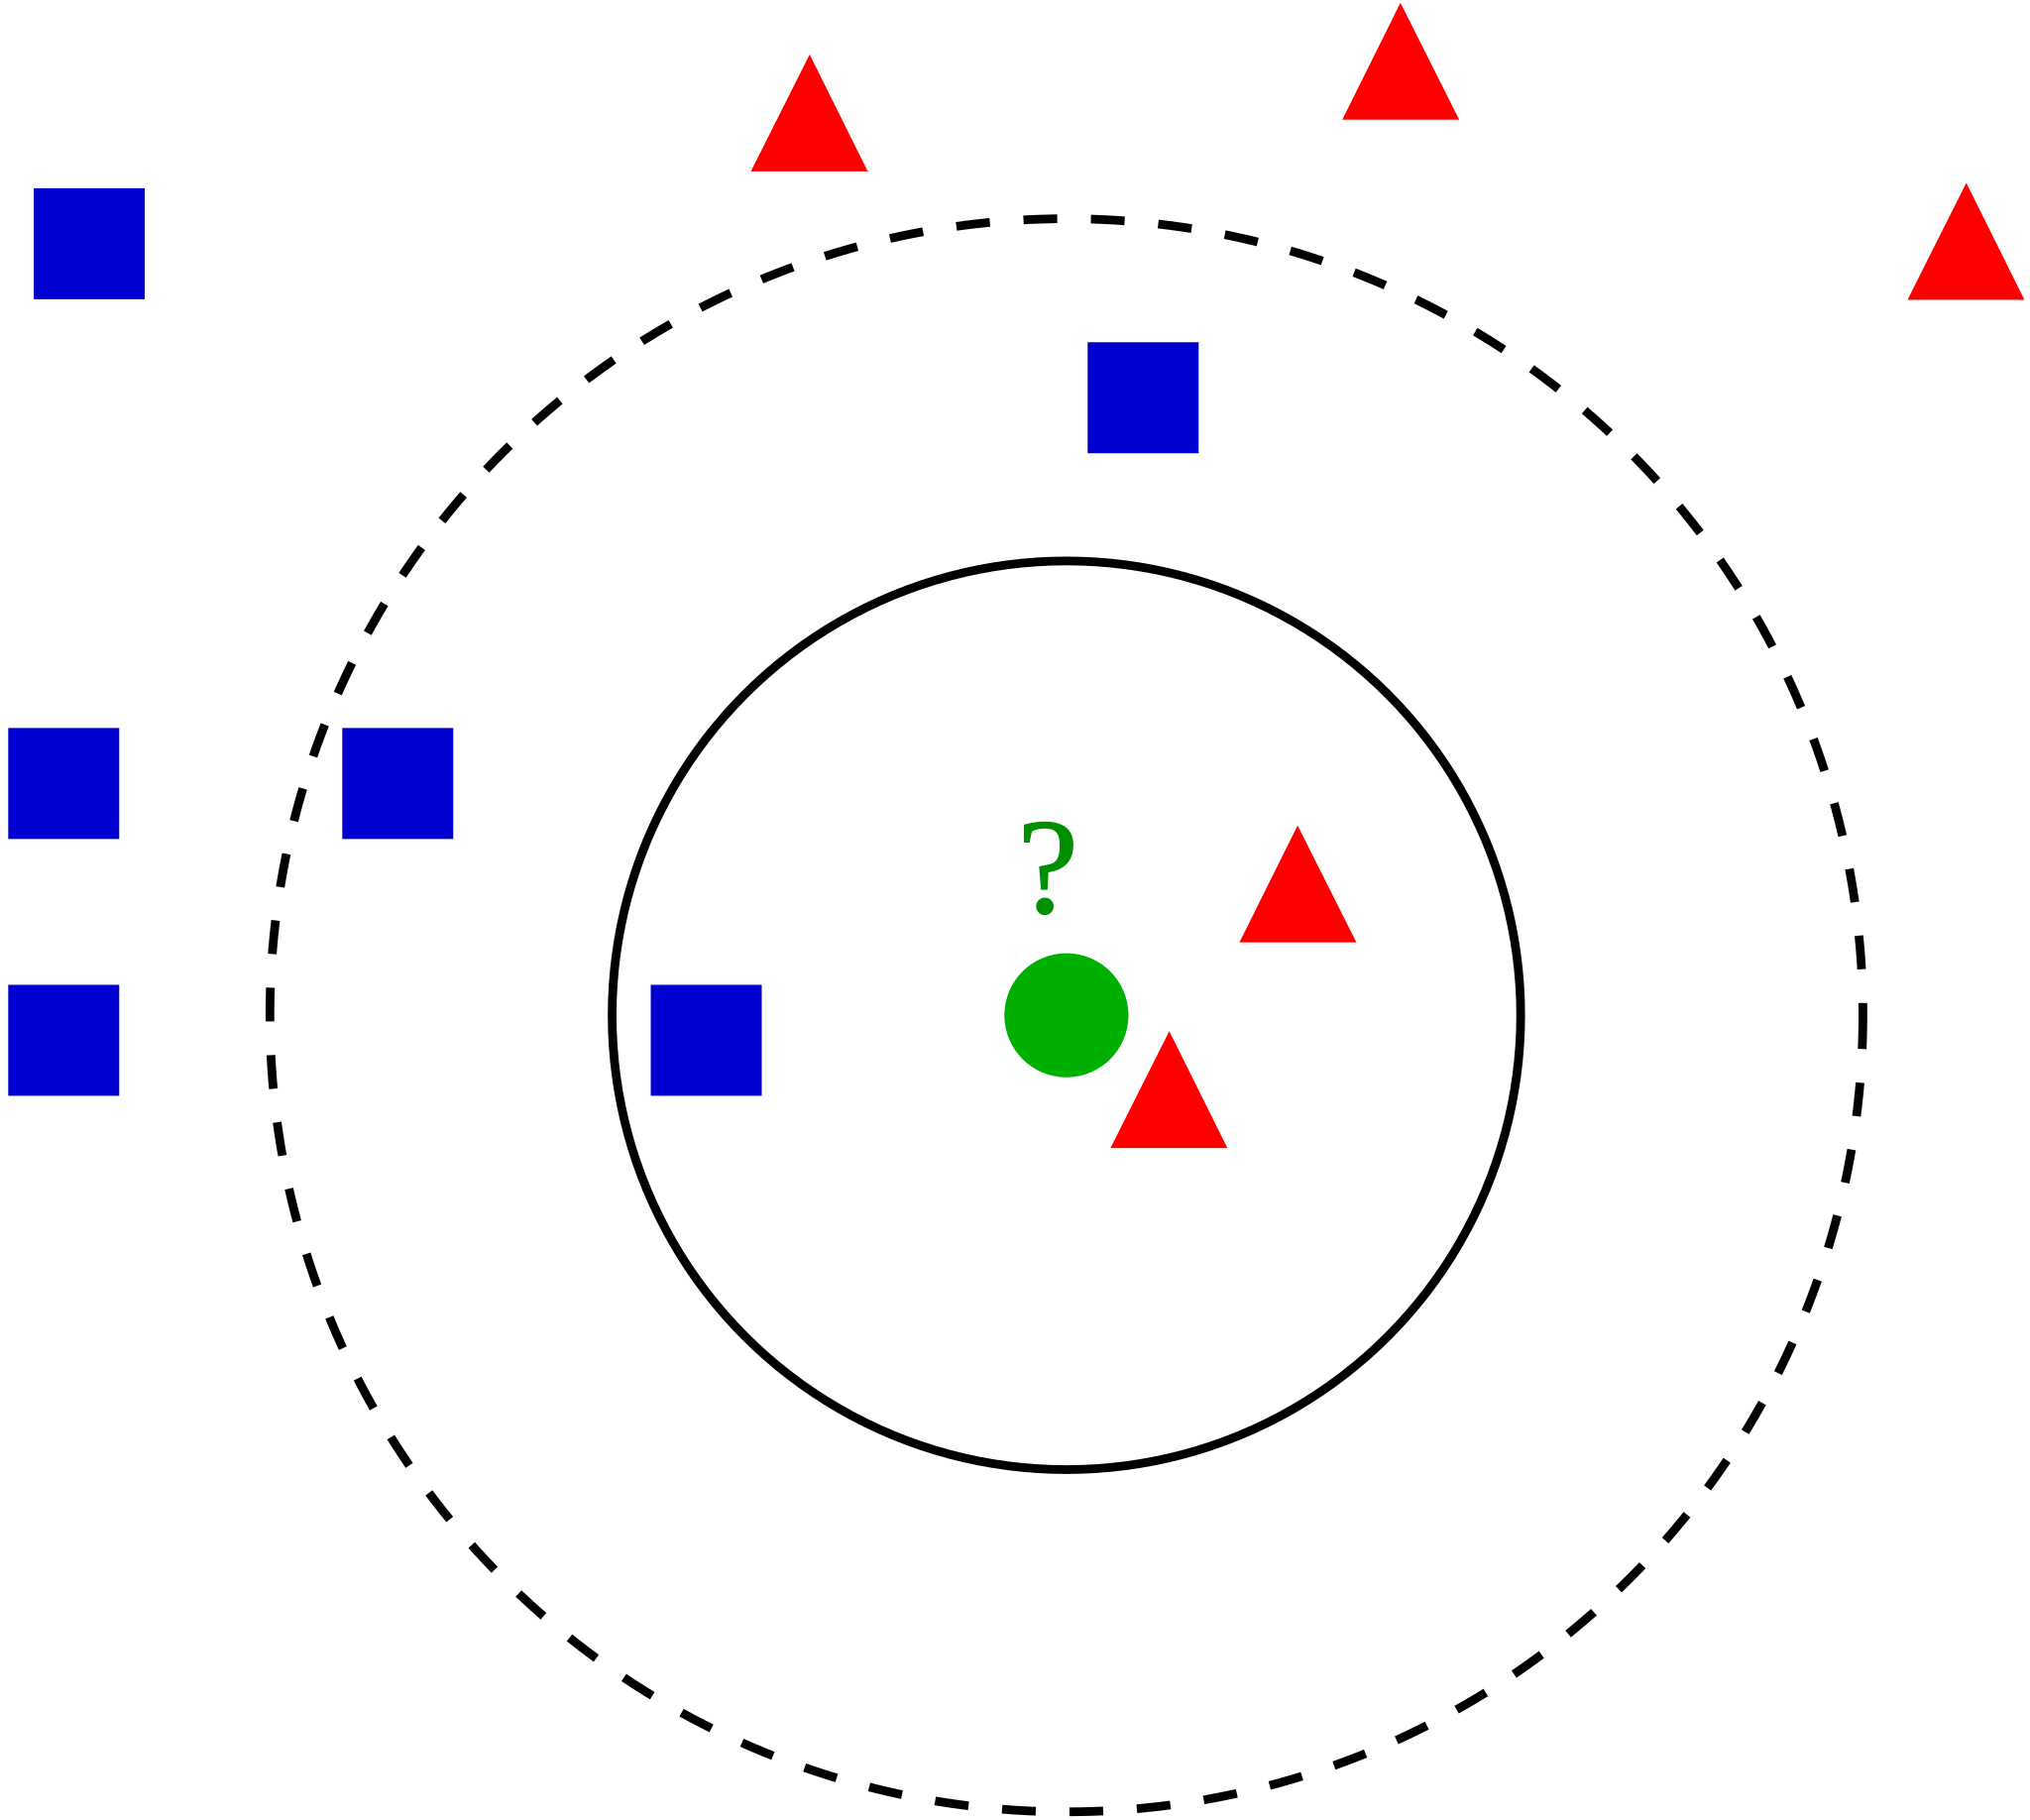

In [91]:
SVG(url="https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg")

In [92]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

In [93]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<center>Dzielimy naszą bazę na atrybuty i klasy</center>

In [94]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

### <center>Aby uniknac przeuczenia dzielimy zbior w proporcjach 70/30</center>

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [96]:
def k_nearest_classifier(x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray, n_neighbors: int = 5):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    print("METRICS:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    calc_error_for_k_values(range(1,40), x_train, x_test, y_train, y_test)
    return None

In [97]:
def calc_error_for_k_values(range_values: range, x_train: np.ndarray, x_test: np.ndarray, y_train: np.ndarray, y_test: np.ndarray):
    error = []
    for i in range_values:
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(x_train, y_train)
        pred_i = knn.predict(x_test)
        error.append(np.mean(pred_i != y_test))

    plt.plot(range_values, error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Mean Error')
    plt.show()

METRICS:
[[15  0  0]
 [ 0 12  2]
 [ 0  1 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.92      0.86      0.89        14
 Iris-virginica       0.88      0.94      0.91        16

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.93      0.93      0.93        45



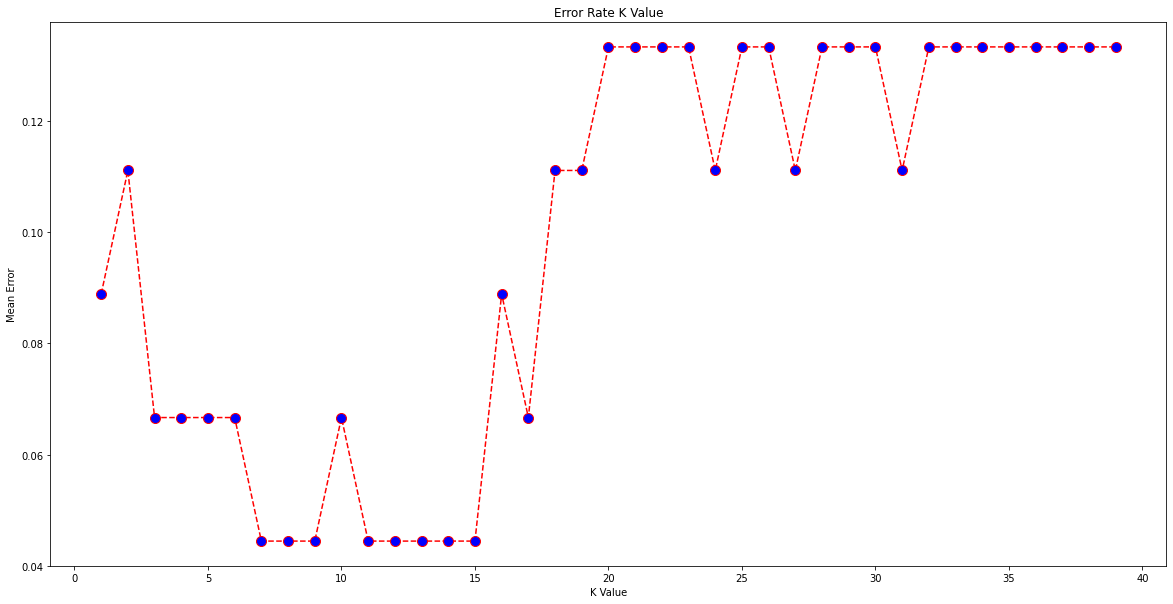

In [98]:
k_nearest_classifier(X_train, X_test, y_train, y_test)

## <center>2. Decision Tree</center>

### <center>podstawy teoretyczne</center>
Drzewa decyzyjne w uczeniu maszynowym służą do wyodrębniania wiedzy z zestawu przykładów .
Zakładamy, że posiadamy zestaw przykładów: obiektów opisanych przy pomocy atrybutów, którym
przyporządkowujemy jakąś decyzję.

In [101]:
Image(url="https://media.geeksforgeeks.org/wp-content/uploads/decisionTree.png")